In [18]:
# imports librarirs
import pandas as pd
import numpy as np
import os
from re import sub
from email import message_from_file, policy
from email.parser import BytesParser
from glob import glob
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import nltk
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
import seaborn as sns
import missingno as msno
import matplotlib as mpl
%matplotlib inline
import scipy.stats as st
from sklearn import tree, ensemble, linear_model


In [19]:
!pip install wordcloud

In [20]:
nltk.download('wordnet') # we will use wordnet lemmatizer
nltk.download('averaged_perceptron_tagger') #to be used for tagger
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [13]:
basePath = '/content/drive/MyDrive/data/'

In [14]:
ham_dir = os.path.join(basePath, 'ham')
spam_dir = os.path.join(basePath, 'spam')
print(ham_dir)

print('hams:', len(glob(f'{ham_dir}/*')))  # hams: 6952
print('spams:', len(glob(f'{spam_dir}/*')))  # spams: 2399

/content/drive/MyDrive/data/ham
hams: 6952
spams: 2399


In [23]:
for message in ham_emails[:2]:
    print(message)
    print('\n')

Subject: alsa-driver.spec tweak for homemade kernels From: Ben Liblit <liblit@eecs.berkeley.edu> To: rpm-zzzlist@freshrpms.net I use a mostly Red Hat 8.0 system, but prefer to configure and build my 
kernel by hand.  I'd like to humbly offer a tweak to alsa-driver.spec 
that helps it build cleanly under such circumstances.  I recognize that 
freshrpms.net packages are designed with standard Red Hat in mind, 
including a standard kernel RPM.  However, I hope that Matthias will 
consider the tweak small enough to justify its incorporation.

The diff is attached below.  The first part of the diff contains a 
conditional that checks to see if the expected RPM is installed.  If it 
is, %{karch} is set as before and a new %{krpm} flag is set to 1.  If 
the expected RPM is not installed, then %{karch} is instead set using 
"uname -p", while %{krpm} is left undefined.

The second part of the diff is simpler.  We only require that 
kernel-source be installed if the kernel itself came from an RP

In [40]:
data.head(10)

,email,label,clean_email
0,Subject: alsa-driver.spec tweak for homemade k...,ham,subject alsa driver spec tweak for homemade ke...
1,Subject: Re: use new apt to do null to RH8 upg...,ham,subject re use new apt to do null to rh upgrad...
2,Subject: Re: Limbo beta 2 ? From: Gary Peck <g...,ham,subject re limbo beta from gary peck gbpeck sb...
3,Subject: Limbo beta 2 ? From: Angles Puglisi...,ham,subject limbo beta from angles puglisi angles ...
4,Subject: Re: gentoo 0.11.31 released... From: ...,ham,subject re gentoo released from michel alexand...
5,Subject: Re: use new apt to do null to RH8 upg...,ham,subject re use new apt to do null to rh upgrad...
6,Subject: Re: use new apt to do null to RH8 upg...,ham,subject re use new apt to do null to rh upgrad...
7,Subject: Re: Advise on RPM buidling From: Matt...,ham,subject re advise on rpm buidling from matthia...
8,Subject: Re: gentoo 0.11.31 released... From: ...,ham,subject re gentoo released from matthias saou ...
9,Subject: Re: Gabber packages for 8.0 (was: All...,ham,subject re gabber packages for was all set for...


In [71]:
data.tail(10)

,email,label,clean_email
9341,Subject: EMAIL LIST - 100 MILLION ADDRESSES $7...,spam,subject email list million addresses from rob ...
9342,Subject: Please help Home Entertainment Compan...,spam,subject please help home entertainment compani...
9343,Subject: [ILUG] From the desk of : George Osaw...,spam,subject ilug from the desk of george osawa fro...
9344,Subject: Attn:Targeted email addresses From: a...,spam,subject attn targeted email addresses from and...
9345,Subject: International calls for only 33 cents...,spam,subject international calls for only cents per...
9346,Subject: RUIN ANYONE ANYWHERE ANYTHING From: p...,spam,subject ruin anyone anywhere anything from pet...
9347,"Subject: Industry Forum #136 From: ""Industry F...",spam,subject industry forum from industry forum hos...
9348,Subject: Production Mini-plants in mobile cont...,spam,subject production mini plants in mobile conta...
9349,Subject: discreet penis enlargement 4623 From:...,spam,subject discreet penis enlargement from webmas...
9350,Subject: 6% AVG Guaranteed for 5 Years From: S...,spam,subject avg guaranteed for years from signatur...


No charts were generated by quickchart


In [65]:
data.describe()

,email,label,clean_email
count,9351,9351,9351
unique,7508,2,7486
top,Subject: One of a kind Money maker! Try it for...,ham,subject one of a kind money maker try it for f...
freq,8,6952,8


In [43]:
## Check for empty values
data.isnull().sum().sort_values(ascending = False)

email          0
label          0
clean_email    0
dtype: int64

In [44]:
nulls = data.isnull().sum()
nulls = nulls.to_frame("nulls").sort_values("nulls", ascending = False)
print(nulls)

             nulls
email            0
label            0
clean_email      0


<Axes: >

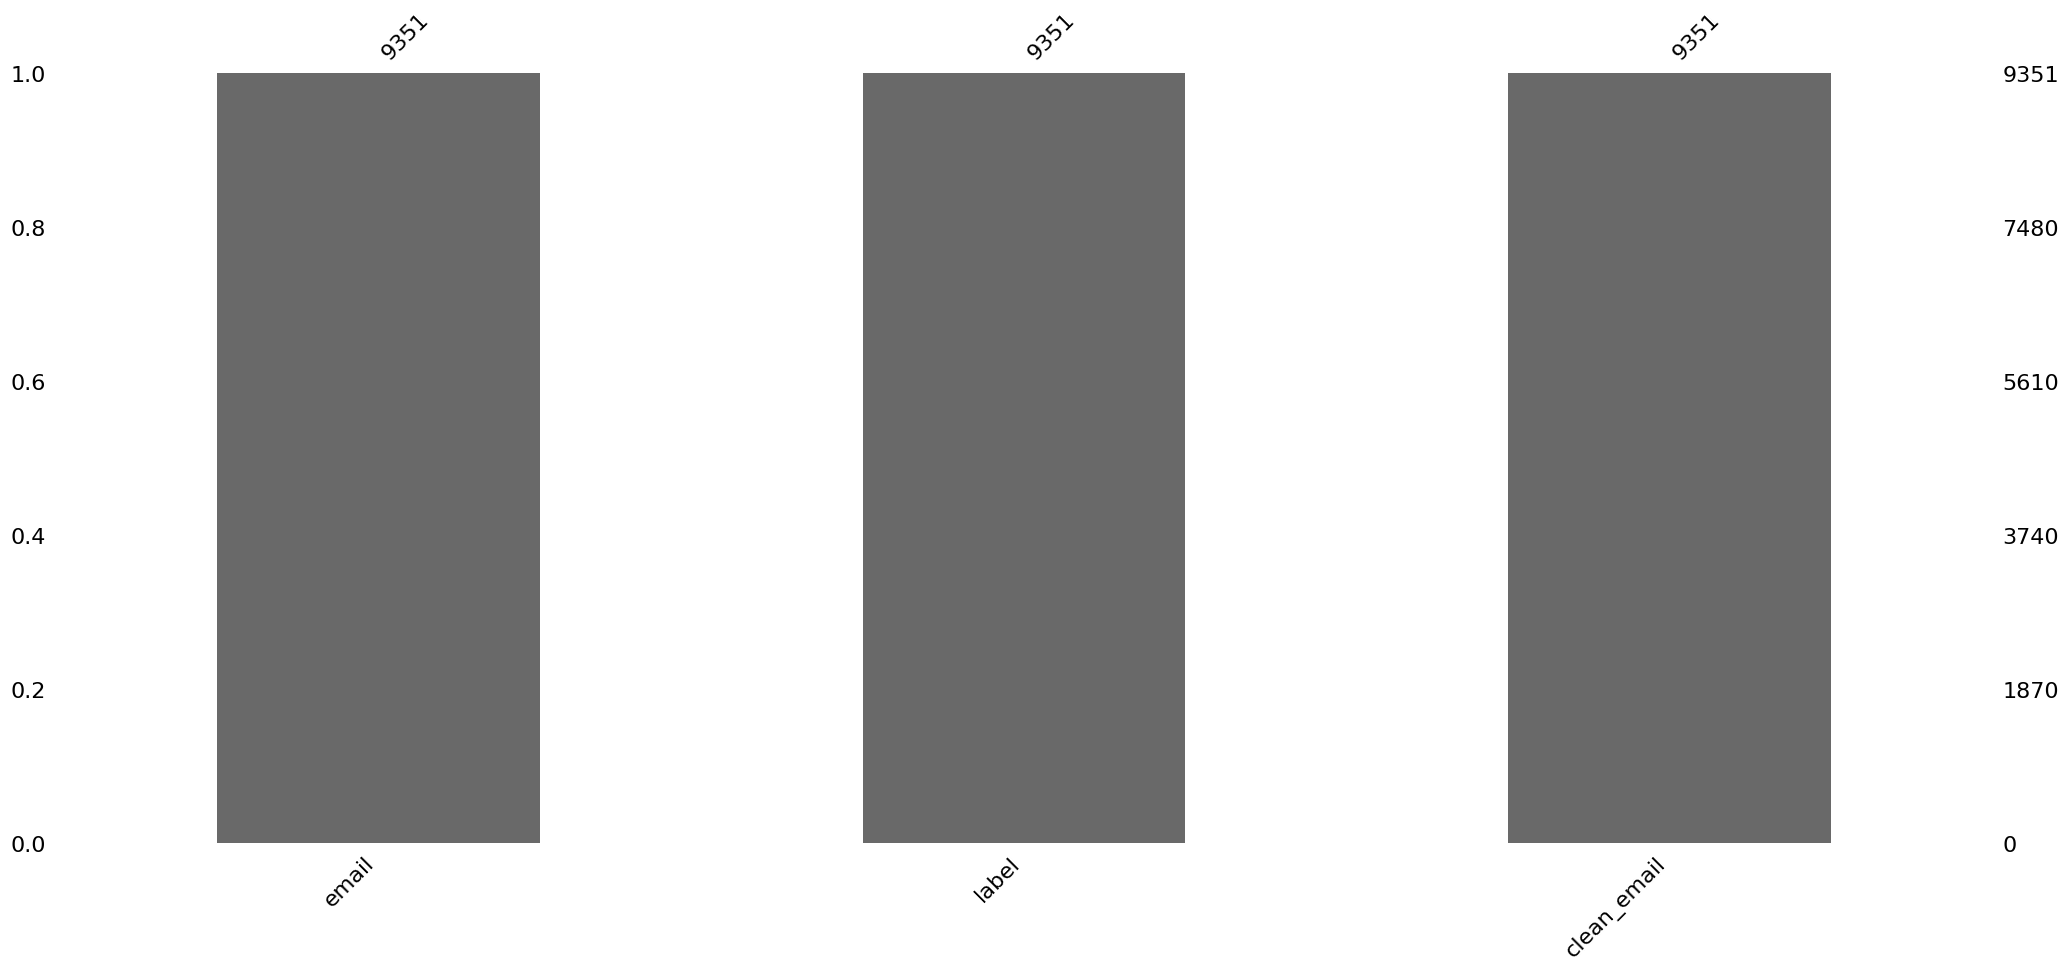

In [45]:
msno.bar(data)


<Axes: xlabel='label', ylabel='count'>

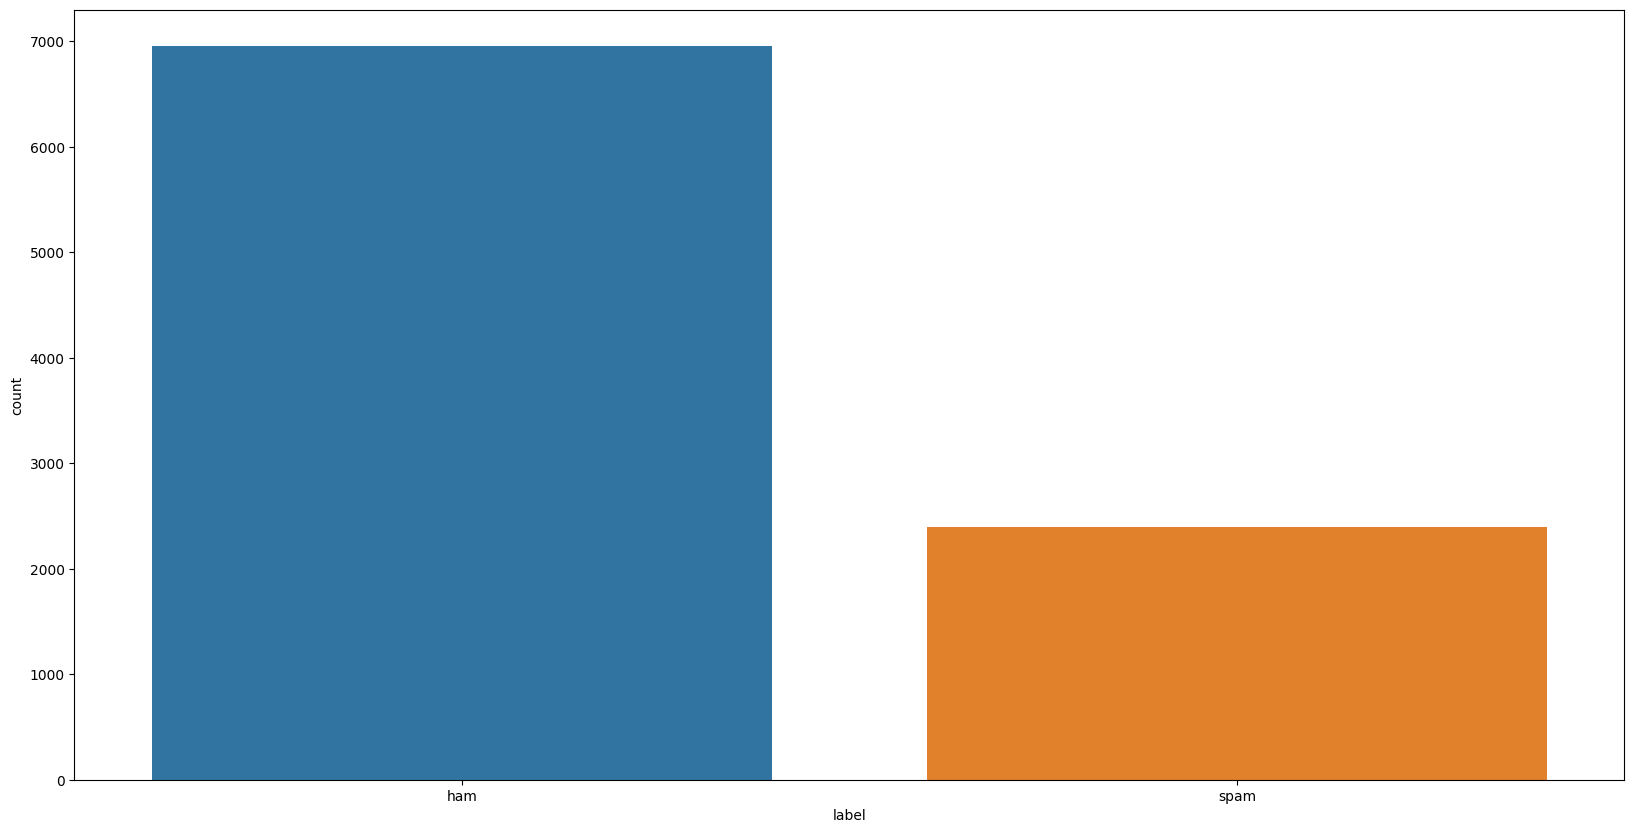

In [60]:
plt.figure(figsize = (20,10))
custom_palette = sns.color_palette("Set2")
sns.countplot(x="label", data=data, hue="label")

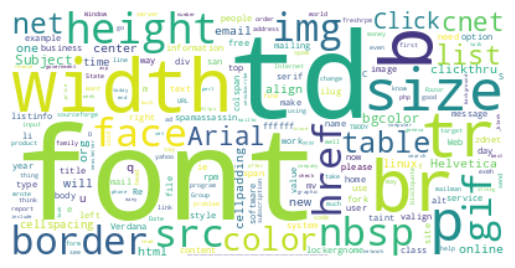

In [69]:
#Generate two word clouds, one for ham and one for spam to study most used words in them visually
true = data.loc[data['label']=='ham']
fake = data.loc[data['label']=='spam']


text1 = " ".join(cat for cat in data['cleanemail'])

text2 = " ".join(cat2 for cat2 in data['email'])


word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text1)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
#visualize missing values

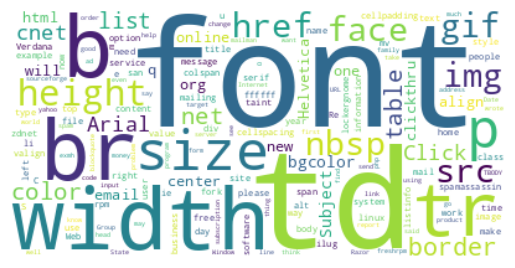

In [70]:
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text2)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [15]:


# spamassassin email corpus -
# based on code from https://medium.com/@thiagolcmelo/train-you-own-spam-detector-57725e8e81c0 -
# train your own spam detector

# ham_dir = path.join('data', 'ham')
# spam_dir = path.join('data', 'spam')

# print('hams:', len(glob(f'{ham_dir}/*')))  # hams: 6952
# print('spams:', len(glob(f'{spam_dir}/*')))  # spams: 2399

# define classes for functionality
class StandardEmail:
    def __init__(self, subject: str, body: str, origin: str, destination: str):
        self.destination = destination
        self.origin = origin
        self.subject = subject
        self.body = body

    @property
    def clean(self):
        sanitizer = '[^A-Za-z]+'
        clean = sub(sanitizer, ' ', f'{self.subject} {self.body} {self.origin} {self.destination}')
        clean = clean.lower()
        return sub('\s+', ' ', clean)

    @property
    def structured_clean(self):
        sanitizer = '[^A-Za-z]+'
        subject = sub(sanitizer, ' ', f'{self.subject}').lower().lstrip()
        body = sub(sanitizer, ' ', f'{self.body}').lower().lstrip()
        origin = sub(sanitizer, ' ', f'{self.origin}').lower().lstrip()
        destination = sub(sanitizer, ' ', f'{self.destination}').lower().lstrip()

        return [sub('\s+', ' ', origin), sub('\s+', ' ', destination), sub('\s+', ' ', subject), sub('\s+', ' ', body)]

    def __str__(self):
        subject = f'subject: {self.subject}'
        body_first_line = self.body.split('\n')[0]
        body = f'body: {body_first_line}...'
        return f'{subject}\n{body}'

    def __repr__(self):
        return self.__str__()

# cycle through and read each email into memory
class EmailIterator:
    def __init__(self, directory: str):
        self._files = glob(f'{directory}/*')
        self._pos = 0

    def __iter__(self):
        self._pos = -1
        return self

    def __next__(self):
        if self._pos < len(self._files) - 1:
            self._pos += 1
            return self.parse_email(self._files[self._pos])
        raise StopIteration()

    @staticmethod
    def parse_email(filename: str) -> StandardEmail:
        with open(filename,
                  encoding='utf-8',
                  errors='replace') as fp:
            message = message_from_file(fp)

        subject = None
        for item in message.keys():
            if item == 'Subject':
                subject = item

        if message.is_multipart():
            body = []
            for b in message.get_payload():
                body.append(str(b))
            body = '\n'.join(body)
        else:
            body = message.get_payload()

        return StandardEmail(subject, body, message["From"], message["To"])

# load emails into memory

ham_emails = EmailIterator('data/ham')

spam_emails = EmailIterator('data/spam')

# now we have two lists of emails
# forgo loading hams for testing -----------------------
# print("Loading Ham Emails into Memory Please Wait...")
# hams = [email.structured_clean for email in ham_emails]

# loading spams for testing ----------------------------
print("Loading Spam Emails into memory Please Wait...")
spams = [email.structured_clean for email in spam_emails]

# ▚▚▚▚ Exploratory Data Analysis ▚▚▚▚▚▚▚▚▚▚▚▚▚▚▚▚▚▚▚▚▚▚▚▚▚▚▚▚▚▚▚▚▚▚▚▚▚▚▚▚▚▚▚▚▚▚▚▚▚▚▚▚▚▚▚▚▚▚▚▚▚▚▚▚▚▚▚▚▚▚▚▚▚▚▚▚▚▚▚▚▚▚▚▚▚▚▚

# HAM
# XXX #

# SPAM
Spam_Subject = []
Spam_Body = []
Spam_From = []
Spam_To = []
for item in spams:
    Spam_From.append(item[0])
    Spam_To.append(item[1])
    Spam_Subject.append(item[2])
    Spam_Body.append(item[3])

Spam_Dictionary = {"From": Spam_From, "To": Spam_To, "Subject": Spam_Subject, "Body": Spam_Body}
Spam_DataFrame = pd.DataFrame(Spam_Dictionary)

# Preprocessing and Feature Engineering ########################################################

# A3M Update: Function to load and parse emails
# BytesParser is pythons email parser where policy=default suits all typical email parsing tasks.
def load_emails(directory):
    emails = []
    for filename in glob(f'{directory}/*'):
        with open(filename, 'rb') as file:
            msg = BytesParser(policy=policy.default).parse(file)
        # Email parts parsing
        subject = msg.get('subject', '')
        email_from = msg.get('from', '')
        email_to = msg.get('to', '')
        # Body:
        if msg.is_multipart():
            content = ''.join(part.get_payload(decode=True).decode('utf-8', errors='ignore')
                              for part in msg.get_payload() if part.get_content_type() == 'text/plain')
        else:
            content = msg.get_payload(decode=True).decode('utf-8', errors='ignore')
        # Combining all parts
        full_content = f'Subject: {subject} From: {email_from} To: {email_to} {content}'
        emails.append(full_content)
    return emails

# A3M Add: Loading and preprocessing data
ham_emails = load_emails(ham_dir)
spam_emails = load_emails(spam_dir)

# A3M Add: Combining ham and spam emails into a dataFrame
labels = ['ham'] * len(ham_emails) + ['spam'] * len(spam_emails)
all_emails = ham_emails + spam_emails
data = pd.DataFrame({
    'email': all_emails,
    'label': labels
})

# A3M Add: Preprocessing and cleaning (removing non alphabet chars) the email content
data['clean_email'] = data['email'].apply(lambda x: sub('[^A-Za-z]+', ' ', x).lower().strip())

# A3M Add: Handling missing values 2Feb2024;2:17pm
print('Mising Values before:')
print(data.isnull().sum())
data['clean_email'].fillna('', inplace=True)
print('Mising Values after:')
print(data.isnull().sum())

# A3M Add: Handling duplicates 2Feb2024;2:17pm
print('Duplicates before:')
print(data.duplicated().sum())
data.drop_duplicates(inplace=True)
print('Duplicates after:')
print(data.duplicated().sum())

# Feature Extraction ###################################################################################

# A3M Update: Feature extraction using TF IDF and stopwords handling
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
vectorizer = TfidfVectorizer(stop_words=stop_words, max_features=100)  # Could be more than 100
features = vectorizer.fit_transform(data['clean_email'])

# A3M Add: Converting the features to a DataFrame
features_df = pd.DataFrame(features.toarray(), columns=vectorizer.get_feature_names_out())

# A3M Add: Combining features with the original data (email content and label)
final_data = pd.concat([data.reset_index(drop=True), features_df], axis=1)

# A3M Add: Printing final dataset with feature scores
print("Features obtained with TF IDF")
print(final_data)

#############################################################################################################
# A3M Add: Other testing and insights of a more refined feature engineering

# Calculating the average TF IDF score for each feature (word)
# Idea would be to find words with the highest TF IDF score as these should be the most significant in diff spam vs ham
# Next we could filter this out and train base solely on this top n features to further avoid overfitting
# We could also convert label feature to binary ham=1 and spam=0 to help on the training
# For now we could train as is and see how good it performs

mean_tfidf = final_data.drop(columns=['email', 'label', 'clean_email']).mean().sort_values(ascending=False)
# A3M Add: Selecting top n features
top_n_features = 20  # We can change this
top_features = mean_tfidf.head(top_n_features)

print("Top features obtained with TF IDF")
print(top_features)

Loading Spam Emails into memory Please Wait...


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Features obtained with TF IDF
                                                  email label  \
0     Subject: alsa-driver.spec tweak for homemade k...   ham   
1     Subject: Re: use new apt to do null to RH8 upg...   ham   
2     Subject: Re: Limbo beta 2 ? From: Gary Peck <g...   ham   
3     Subject: Limbo beta 2 ? From:  Angles  Puglisi...   ham   
4     Subject: Re: gentoo 0.11.31 released... From: ...   ham   
...                                                 ...   ...   
9346  Subject: RUIN ANYONE ANYWHERE ANYTHING From: p...  spam   
9347  Subject: Industry Forum #136 From: "Industry F...  spam   
9348  Subject: Production Mini-plants in mobile cont...  spam   
9349  Subject: discreet penis enlargement 4623 From:...  spam   
9350  Subject: 6% AVG Guaranteed for 5 Years From: S...  spam   

                                            clean_email  align  also  alt  \
0     subject alsa driver spec tweak for homemade ke...    0.0   0.0  0.0   
1     subject re use new apt to do 